In [1]:
import straticor
import matplotlib.pyplot as plt

In [2]:
plt.style.use("https://raw.githubusercontent.com/srnarvaez/my-mpl-themes/main/basic.mplstyle")

column = straticor.load_column("../data/pozo/alborada_1/alborada_1.xlsx", serialize=True, delta=0.2)

col_1 = column.query("bottom > 9406").copy()
col_2 = column.query("bottom < 9227 & bottom > 9215.5").copy()

col_2["bottom"] = col_2["bottom"] + 195

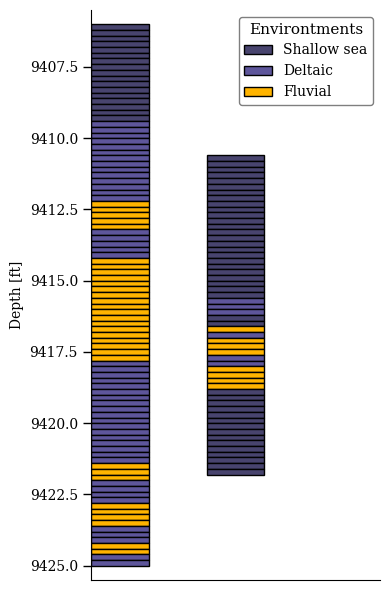

In [3]:
max_min = (max(col_1["bottom"].max(),col_2["bottom"].max()) + 0.5, min(col_1["bottom"].min(), col_2["bottom"].min()) - 0.5)

fig, ax = plt.subplots(1, figsize=(4, 6))

straticor.plot_column(column=col_1, ax=ax, x_pos=0.0, width=0.2)
straticor.plot_column(column=col_2, ax=ax, x_pos=0.4, width=0.2)

ax.set(xticks=[], ylabel="Depth [ft]", ylim=max_min)

plt.show()

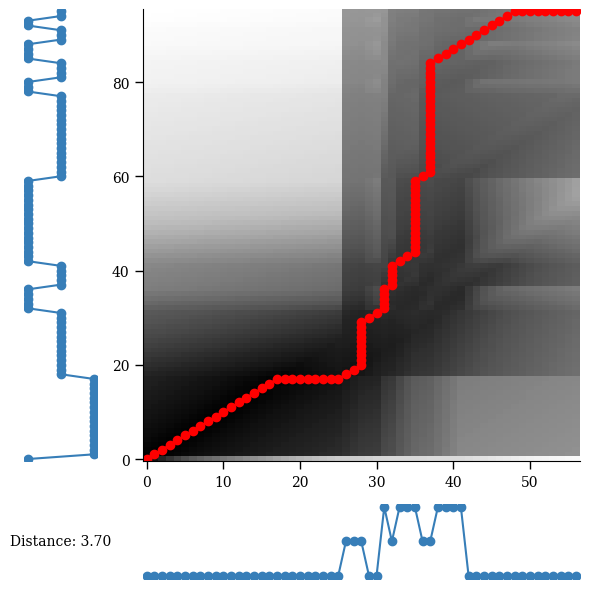

In [4]:
distance, cost_matrix = straticor.dtw_log(col_1, col_2, alpha=0.05, cost_func="chrono", penalty=0.1)
col_3, best_path = straticor.warp_log(col_1, col_2, cost_matrix)


fig = straticor.plot_warpingpaths(col_1, col_2, paths=cost_matrix, best_path=best_path, distance=distance)
fig.set(figwidth=6, figheight=6)
fig.savefig("../images/alborada_1_subset_cost_matrix.svg")

plt.show()

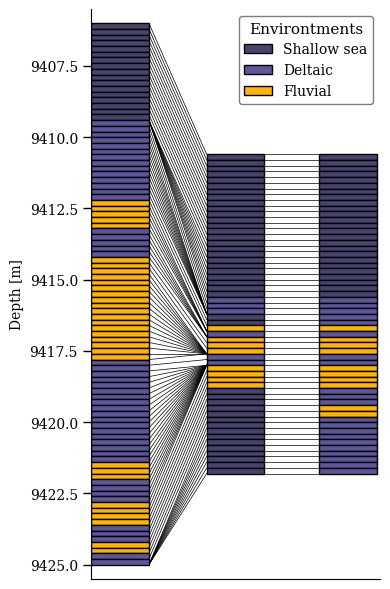

In [5]:
fig, ax = plt.subplots(1, figsize=(4, 6))

straticor.plot_column(column=col_1, ax=ax, x_pos=0.0, width=0.2)
straticor.plot_column(column=col_2, ax=ax, x_pos=0.4, width=0.2)
straticor.plot_column(column=col_3, ax=ax, x_pos=0.79, width=0.2)

for idx, idy in best_path:
    plt.plot([0.2, 0.4], [col_1["bottom"].iloc[idx], col_2["bottom"].iloc[idy]], "-k", lw=0.5, zorder=-1)

for b in col_2["bottom"]:
    plt.plot([0.6, 0.8], [b, b], "-k", lw=0.5, zorder=-1)

ax.set(xticks=[], xlim=(0, 1), ylabel="Depth [m]", ylim=max_min)

fig.savefig("../images/alborada_1_subset_correlation.svg")

plt.show()